In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)

# MNIST data

Now let's look at a slightly larger and more interesting dataset: the MNIST handwritten image dataset.

In [2]:
thin_by = 3
mnist_data = np.load('mnist.npz')
mnist_train_features = mnist_data['train'].T.astype(float)[::thin_by]
mnist_train_labels = mnist_data['train_labels'].flatten()[::thin_by]
mnist_test_features = mnist_data['test'].T.astype(float)[::thin_by]
mnist_test_labels = mnist_data['test_labels'].flatten()[::thin_by]

Our data is now in a $20,000 \times 784$ array. There are 20,000 examples, each being a 784-dimensional vector.

In [3]:
mnist_train_features.shape

(20000, 784)

In [4]:
mnist_train_features[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Each of these vectors is actually a 28x28 image, "flattened" into a vector. We can reshape and visualize it:

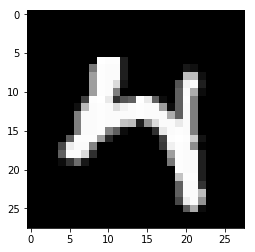

In [5]:
plt.imshow(mnist_train_features[10_000].reshape(28, -1), cmap='gray')

# Eigendigits

Each image in this data set is $28 \times 28 = 784$ pixels. We can think of this image as a vector in $\mathbb R^{784}$, and so it is very high dimensional. Let's reduce the dimensionality using PCA.

First, we center the data:

In [6]:
X = mnist_train_features.T
mu = X.mean(axis=1)
X = X - mu[:,None]

We then compute the eigenvectors of $X X^\intercal$

In [7]:
eigvals, eigvecs = np.linalg.eigh(X @ X.T)

# reorder eigenvalues/vectors from largest to smallest
eigvals = eigvals[::-1]
eigvecs = eigvecs[:,::-1]

If we reduce the dimensionality to the top two eigenvectors we can visualize the data. We see that similar digits are mapped to nearby points.

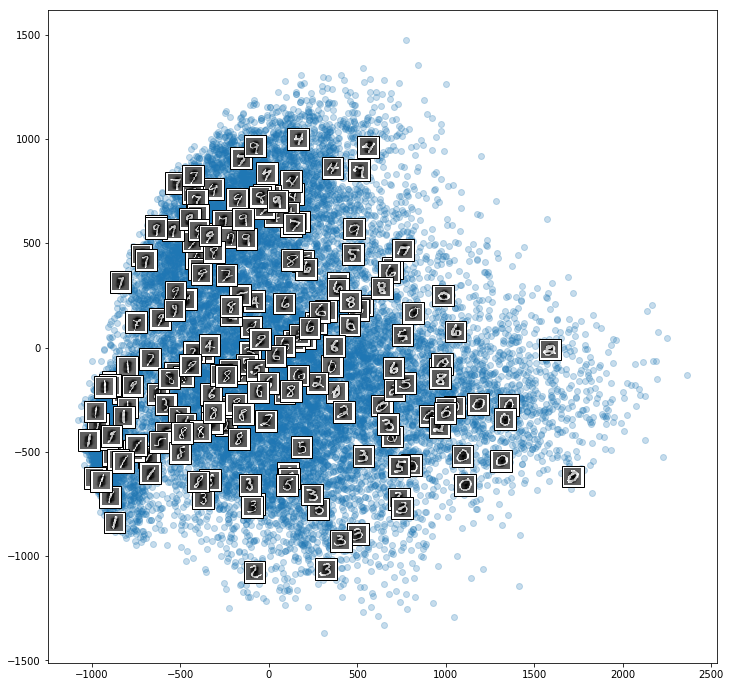

In [20]:
plt.figure(figsize=(12,12))

Z = eigvecs[:,:2].T @ X
plt.scatter(*Z, alpha=.25)

for i in range (0, 20_000, 100):
    img = np.reshape(X[:,i], (28,-1))
    imagebox = OffsetImage(img, zoom=.6, cmap='gray')
    xy = [0.25, 0.45]               # coordinates to position this image

    ab = AnnotationBbox(imagebox, xy,
        xybox=Z[:,i],
        xycoords='data',
        boxcoords="data", pad=.25)                                  
    plt.gca().add_artist(ab)

The eigenvectors are vectors in $\mathbb R^{784}$, just like the input images. If we reshape these vectors so that they are $28\times 28$ we can visualize them as images. Here are the top 10 eigenvectors:

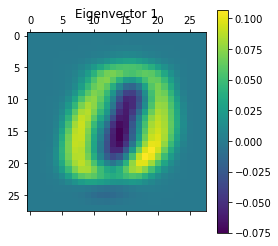

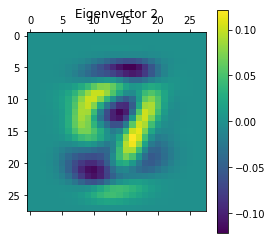

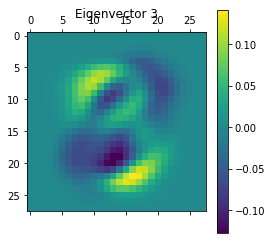

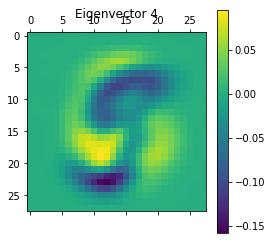

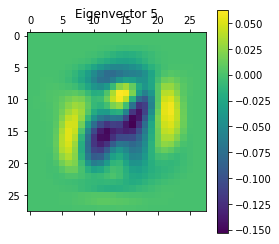

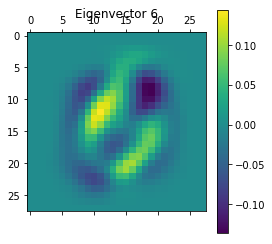

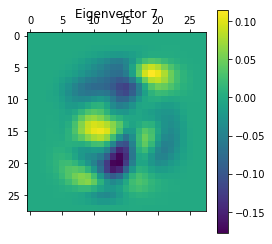

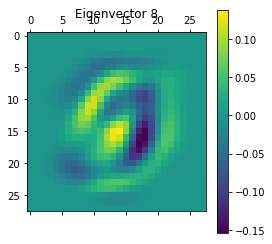

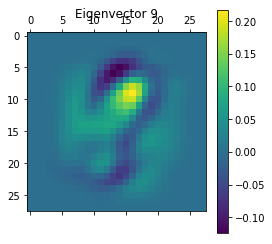

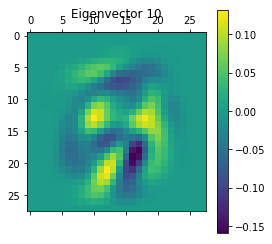

In [21]:
for i in range(10):
    plt.matshow(eigvecs[:,i].reshape(-1, 28))
    plt.title(f'Eigenvector {i+1}')
    plt.colorbar()

Now let's try to reconstruct an image. Suppose we are given this image as input:

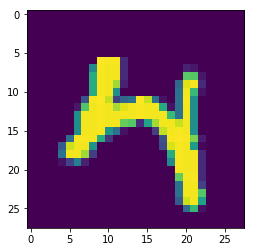

In [22]:
plt.imshow((mu + X[:,10_000]).reshape(-1, 28))

Suppose we have forgotten this image, but we remember its projection onto each of the top $k$ eigenvectors. We can try to reconstruct the image. The larger $k$, the better the reconstruction:

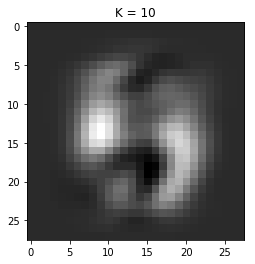

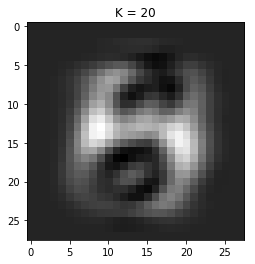

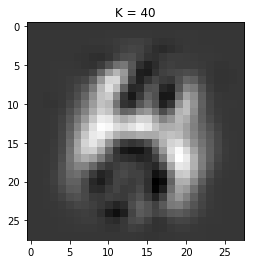

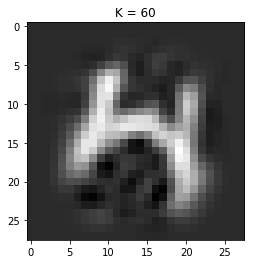

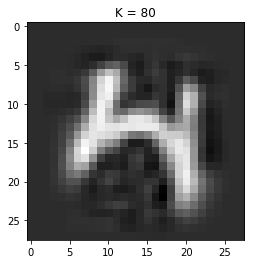

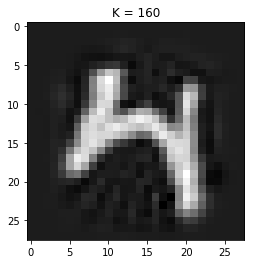

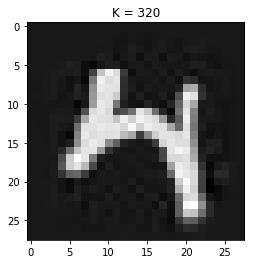

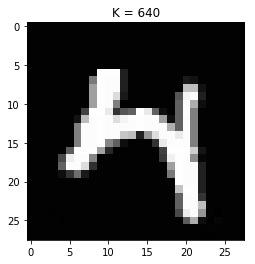

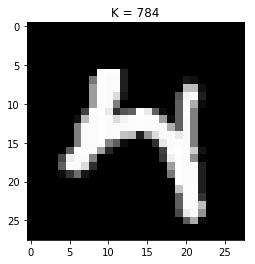

In [26]:
Q = eigvecs.T

for K in [10, 20, 40, 60, 80, 160, 320, 640, 784]:
    P = Q[:K]
    z = P.T @ P @ X[:, 10_000] + mu
    
    plt.figure()
    plt.title(f'K = {K}')
    plt.imshow(z.reshape(-1, 28), cmap='gray')

But really, *any* $28 \times 28$ image can be reconstructed, not just digits:

In [13]:
img = plt.imread('bear.png').astype(float)

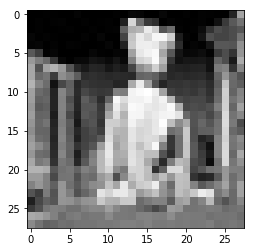

In [14]:
plt.imshow(img, cmap='gray')

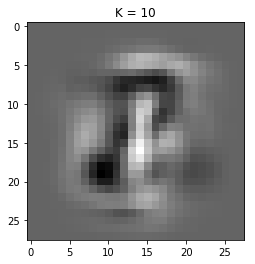

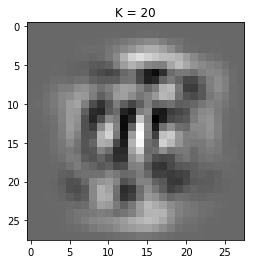

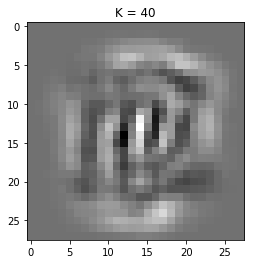

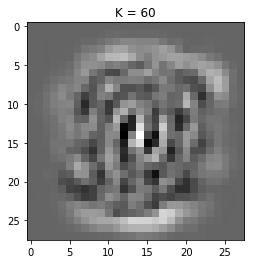

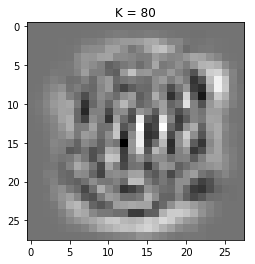

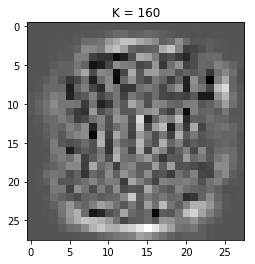

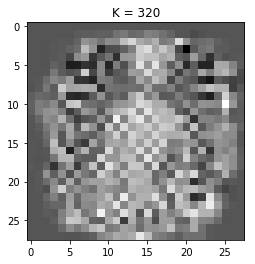

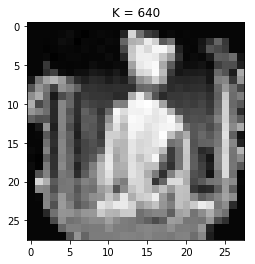

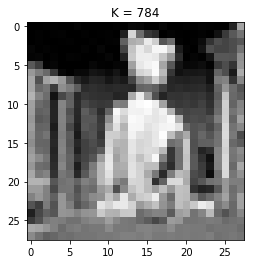

In [15]:
for K in [10, 20, 40, 60, 80, 160, 320, 640, 784]:
    P = Q[:K]
    z = P.T @ P @ (img.flatten() - mu) + mu
    
    plt.figure()
    plt.title(f'K = {K}')
    plt.imshow(z.reshape(-1, 28), cmap='gray')